In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

# 主成分分析（PCA）

- データセットの特徴量を、相互に統計的に関連しないように回転する手法
- 回転した後の特徴量から、データを説明するのに重要な一部の特徴量だけを抜き出す
- 高次元データセットの可視化によく利用される

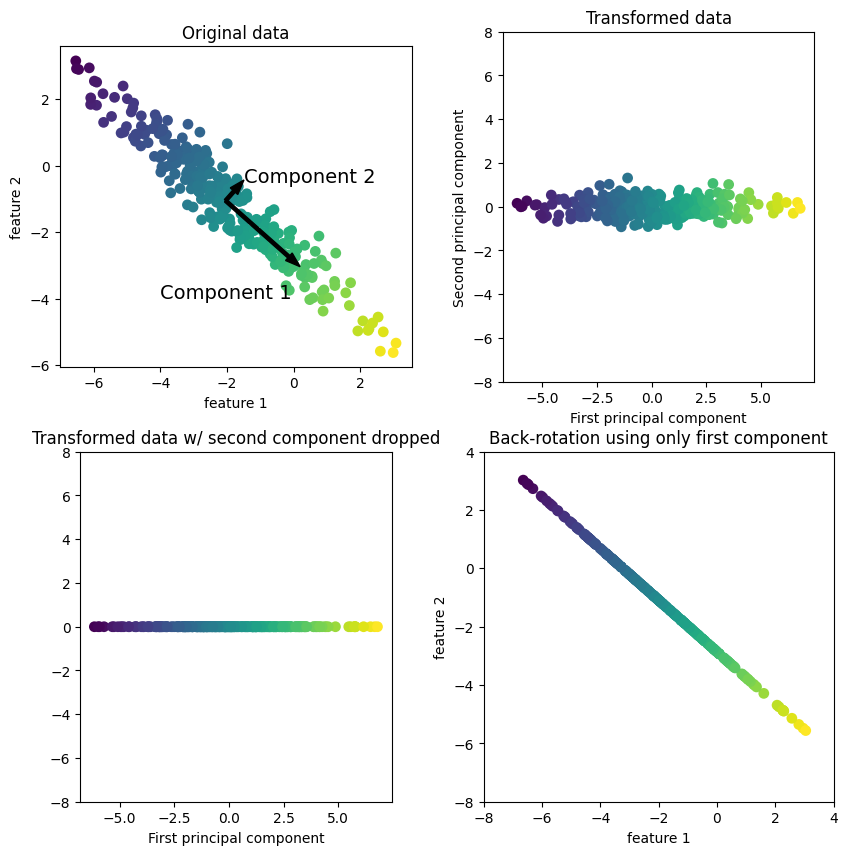

In [2]:
# PCAを合成2次元データに適用した例
mglearn.plots.plot_pca_illustration()

- 左上：もとのデータセット
    1. 最も分散が大きい方向を見つけ、それに「第1主成分」というラベルをつける
    2. 第1成分と直交する方向の中から、最も情報を持っている方向（第2主成分）を探す
    - このようにして見つけていく「方向」を<b>主成分</b>と呼ぶ
    - もとの特徴量と同じ数だけ主成分が存在する
    - データは第1主成分に対して最も情報をもつ＝第1主成分は特徴量が最も相互に関係する方向
- 右上：第1主成分がx軸に沿い、第2主成分がy軸に沿うように回転させたもの
    - ただし、原点の周辺にデータが来るように、回転させる前にデータから平均値を引いてある
    - 回転後の表現では、2つの軸の相関がなくなっている＝データの相関行列は対角成分を除いてゼロになる
- 左下：第1主成分のみを残した場合
    - 特徴量のうち一つを残しているわけではなく、回転後の第2主成分の値を0にしている
- 右下：第1主成分のみを残したデータを逆回転したもの
    - データポイントはもとの特徴空間にあるが、第1主成分に含まれる情報のみ維持されている

## cancerデータセットのPCAによる可視化

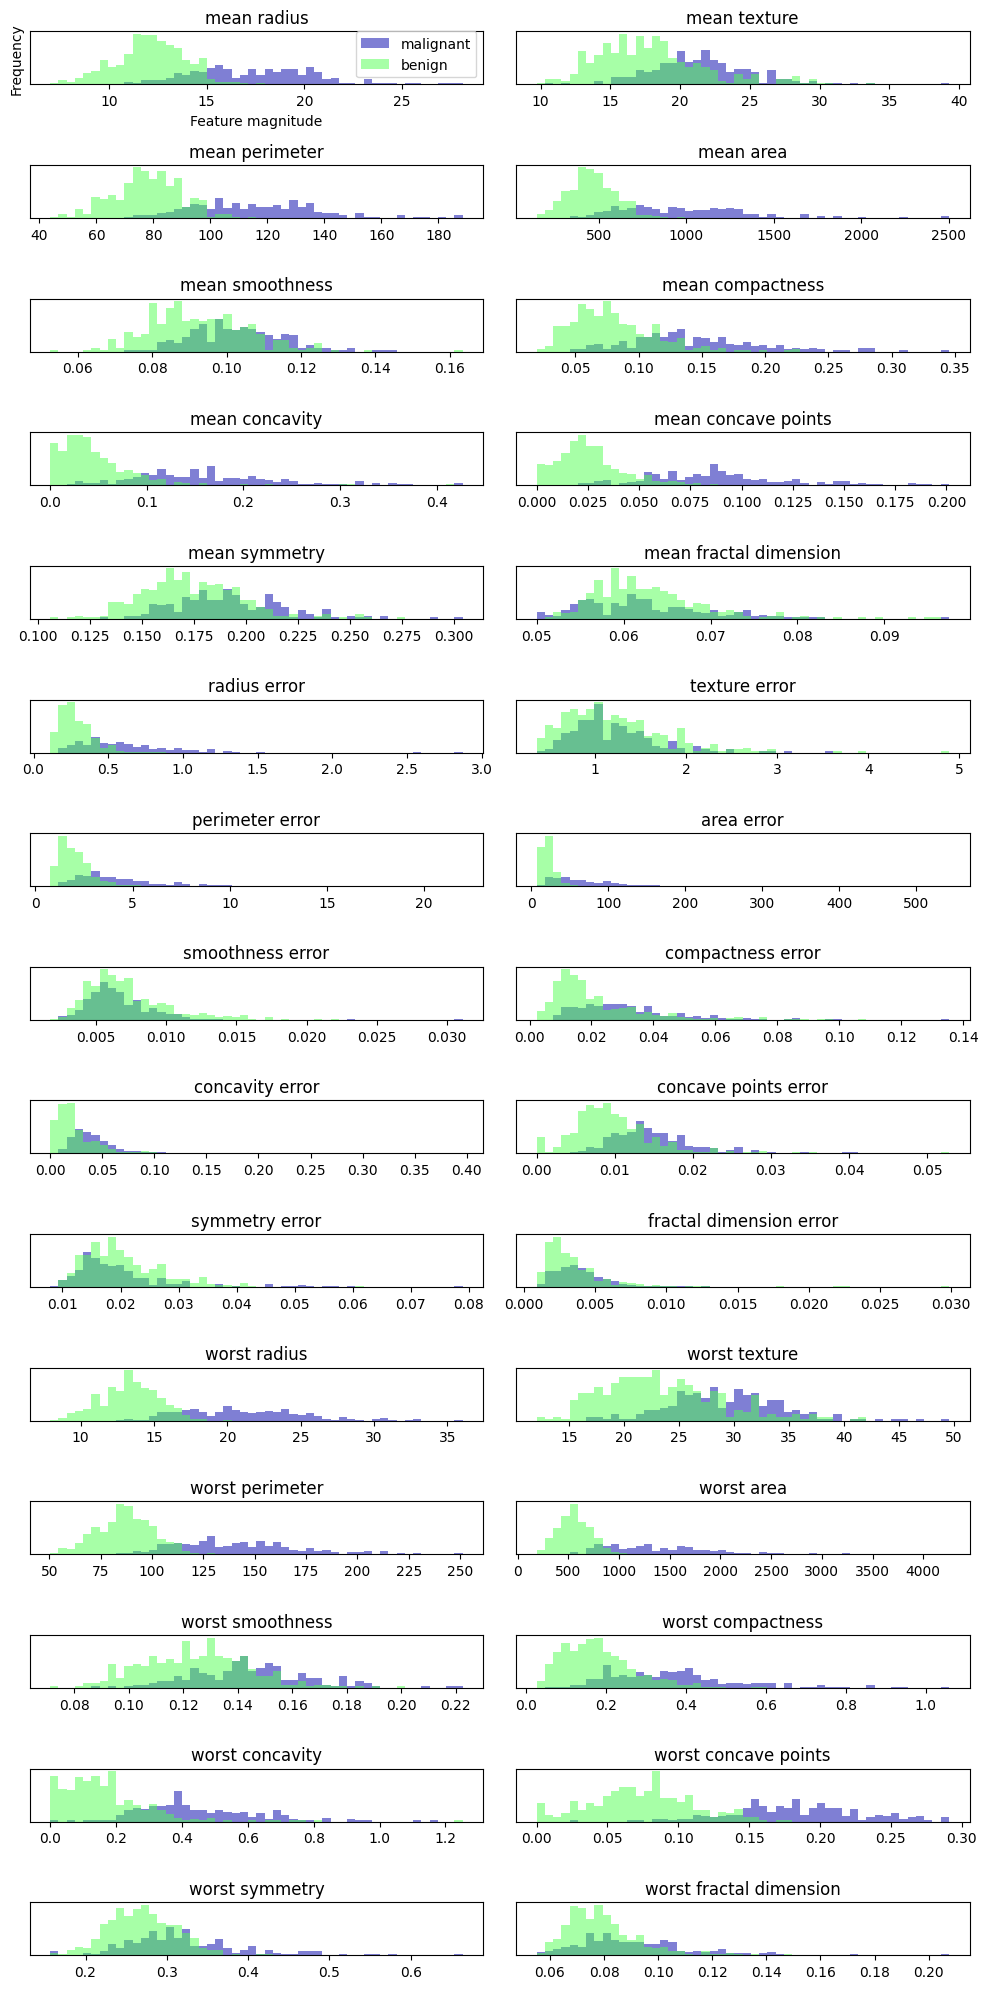

In [3]:
# 特徴量ごとに2つのクラス（良性と悪性）のヒストグラムを書いて可視化する
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [4]:
# PCAを適用する前に、データをStandardScalerでスケール変換する（個々の特徴量の平均を0、分散を1にする）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [5]:
# PCAによる次元削減を適用
from sklearn.decomposition import PCA

# データの最初の2つの主成分だけ維持する
pca = PCA(n_components=2)
# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)

# 最初の2つの成分に対してデータポイントを変換
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

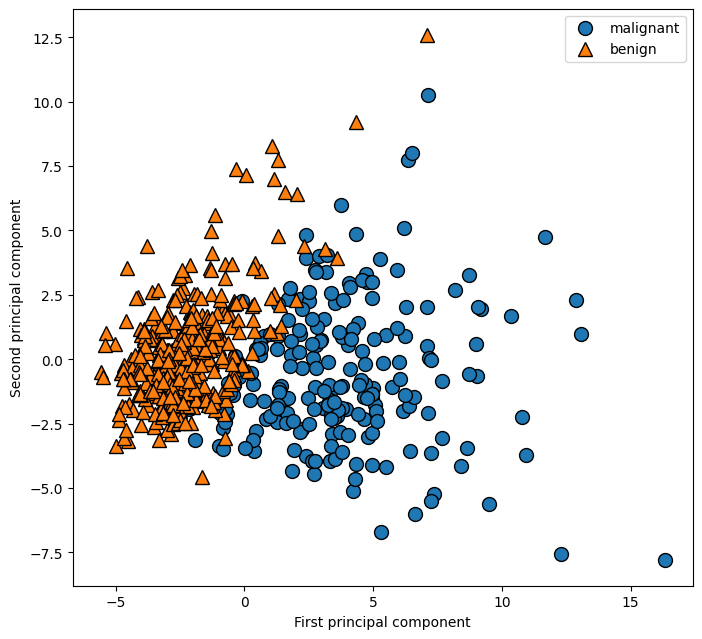

In [6]:
# 第1主成分と第2主成分によるプロット。クラスごとに色分け
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- この結果を見れば、線形クラス分類器でもそれなりに分類可能であることがわかる
- また、悪性のデータポイントは、良性のデータポイントよりも広がっている（分散が大きい）ことがわかる

In [7]:
# PCAの主成分を構成する特徴量を調べる
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [8]:
# それぞれの特徴量が各主成分に与える影響（各特徴量の係数）
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

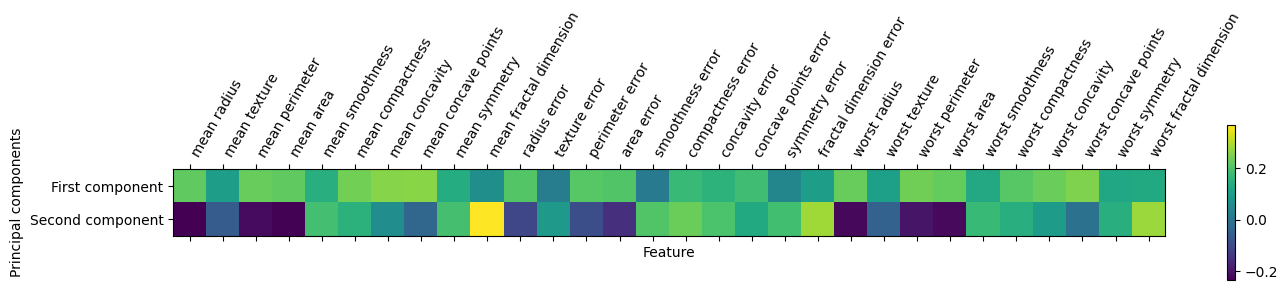

In [9]:
# 係数をヒートマップで表示する
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

- 第1主成分については、すべての値が同一符号になっており、一般的な相関があることを示している
- どちらの主成分でも、すべての特徴量が混ざっているため、回転後の軸の意味を説明するのは難しい

## 固有顔による特徴抽出

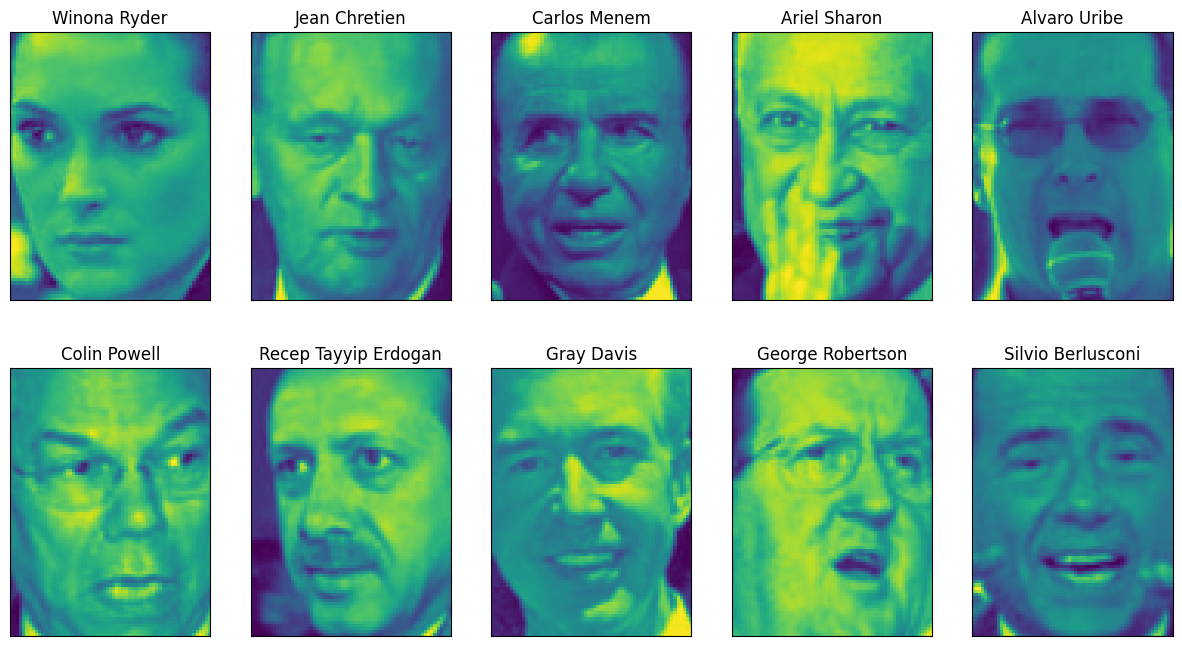

In [11]:
# Labeled Faces in the Wildデータセットのダウンロードとリサイズ
from sklearn.datasets import fetch_lfw_people
# people = fetch_lfw_people()
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [13]:
# lfwデータセットのサイズ
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [14]:
# 各ターゲットの出現回数をカウント
counts = np.bincount(people.target)
# ターゲット名と出現回数を並べて表示
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


- George W Bushの画像が極端に多い
- このままPCAを行うと、Gerge W Bushの特徴に偏ってしまう
    - <b>PCAは、データの分布に偏りがないことを確認してから行うこと</b>

In [19]:
# データセット中の各人の画像を50枚に制限する
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0から255で表現されているグレースケールの値を、0と1の間に変換
# こうしたほうが、数値的に安定する
X_people = X_people / 255.

# データはベクトル化されている（87x65=5655）
print("X_people.shape: {}".format(X_people.shape))
print("y_people.shape: {}".format(y_people.shape))

X_people.shape: (2063, 5655)
y_people.shape: (2063,)


/tmp/ipykernel_105/1178982120.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [21]:
# 各ターゲットの出現回数をカウント
counts = np.bincount(y_people)
# ターゲット名と出現回数を並べて表示
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               50    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell               50    David Beckham              31    
Donald Rumsfeld            50    George Robertson           22    George W Bush              50    
Gerhard Schroeder          50    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                50    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             50    Jean Chretien              50    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


### 1-最近傍クラス分類器の学習（K Nearest Neighbors Classifier）

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# 訓練セットとテストセットにデータを分割
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# KNeighborClassifierを1-最近傍で構築
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.22


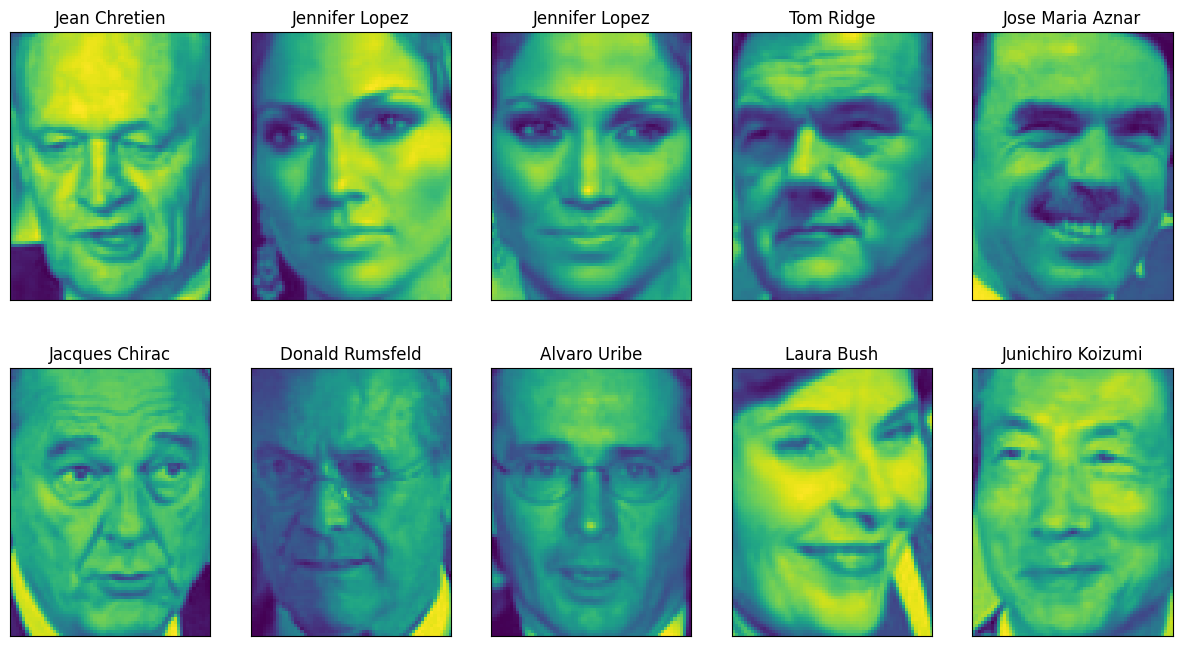

In [83]:
# テストデータの例
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for image, idx, ax in zip(X_test, y_test, axes.ravel()):
#     ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.imshow(image.reshape(image_shape))
    ax.set_title(people.target_names[idx])

- RGB画像特徴の空間で2つの画像を比較する（距離を計測する）ということは、2つの画像の対応する画素値の<b>二乗誤差の累積値</b>を求めることに対応する
- この方法では、例えば片方の画像を1ピクセル分シフトさせた場合の距離は、もとの距離から大きく変化してしまう

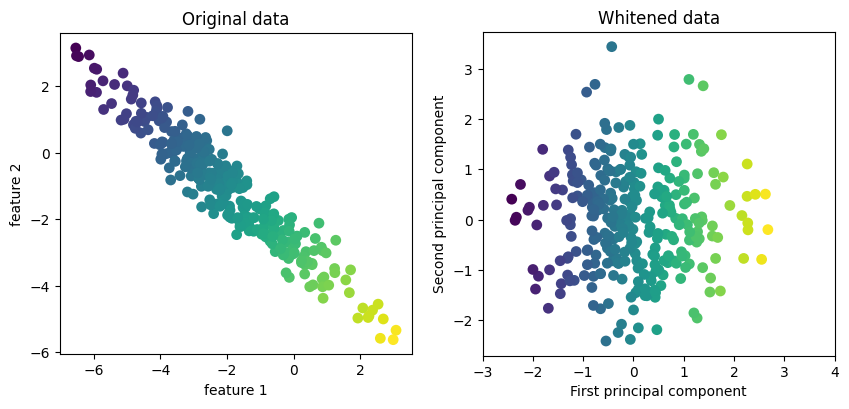

In [24]:
# PCAを用いて主成分に沿った距離を用いる
# PCA白色化 = PCA + StandardScaler（平均0、分散1）
mglearn.plots.plot_pca_whitening()

In [26]:
# 画像データにPCAを適用する
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train.shape: (1547, 5655)
X_train_pca.shape: (1547, 100)


- 1画素を1つの特徴量として、5655画素（87x65）の画像を100画素に次元削減する

In [27]:
# 新しい特徴表現を使って分類
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.30


pca.components_.shape: (100, 5655)


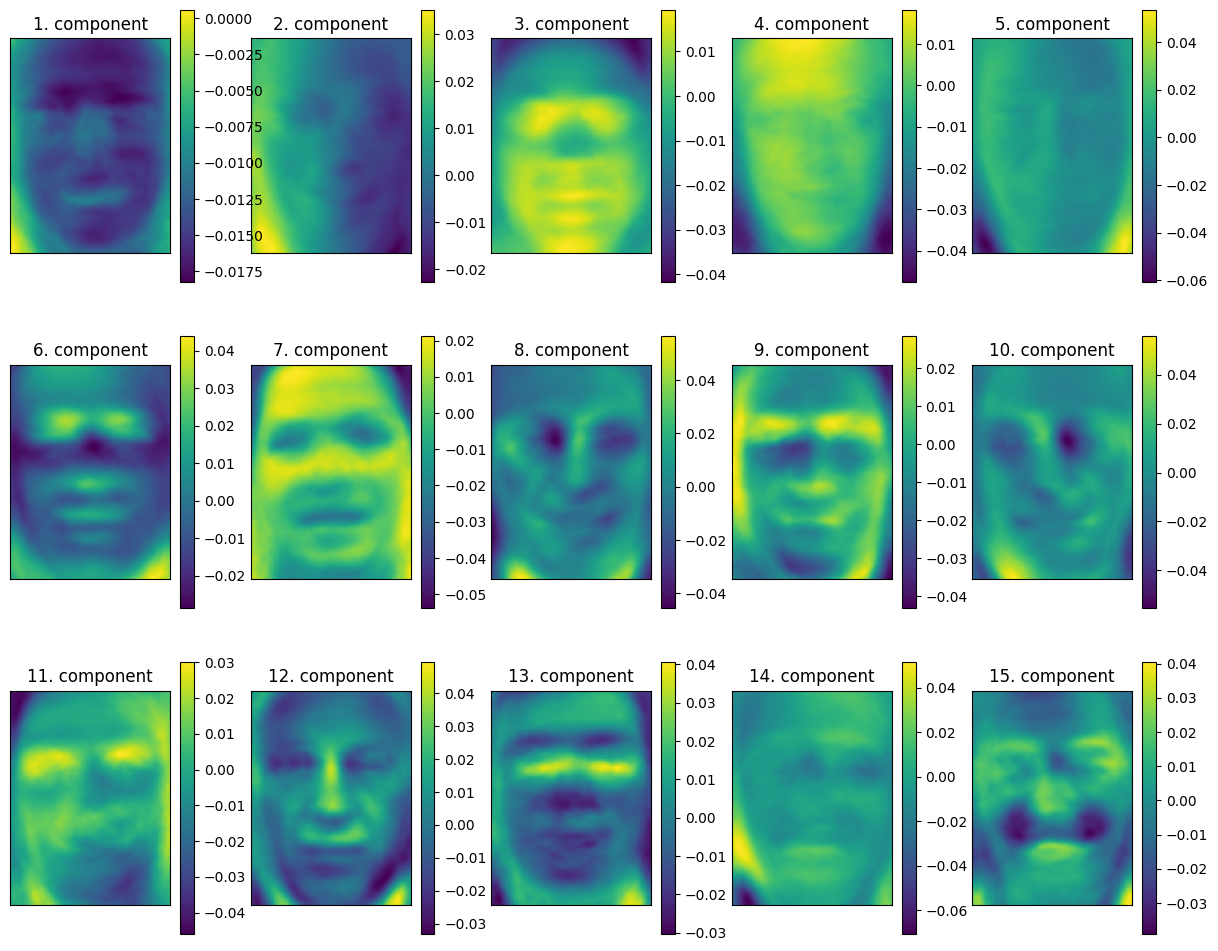

In [40]:
# PCA適用後の入力データ
print("pca.components_.shape: {}".format(pca.components_.shape))

image_shape = people.images[0].shape
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    fig = ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    plt.colorbar(fig)
    ax.set_title("{}. component".format((i + 1)))

- 各画素が、第i主成分にどの程度の影響を与えているかを図示した画像になる
- 第i主成分は、（教師なし）学習したすべての画像に共通する、主成分ごとに異なる何らかの特徴を表す
- 例えば、
    - 第1主成分は、背景（0に近い）と前景（0から遠い）を表現している？
    - 第2主成分は、光のあたり方による左右の明るさの差（正は明るい、負は暗い）を表現している？
- 結果的には、（画像空間での）PCAではうまく特徴を取り出せないと考えられる

### PCAによる特徴表現
- テストデータ$\mathbf{I}$は、第$k$主成分$\theta_k$と係数$\mathbf{x}_k$（$k=1, 2, ..., n$）を用いて、以下のように表現できる
    - $\mathbf{I} = \mathbf{x}_1 * \mathbf{\theta}_1 + \mathbf{x}_2 * \mathbf{\theta}_2 + ... + \mathbf{x}_n * \mathbf{\theta}_n$

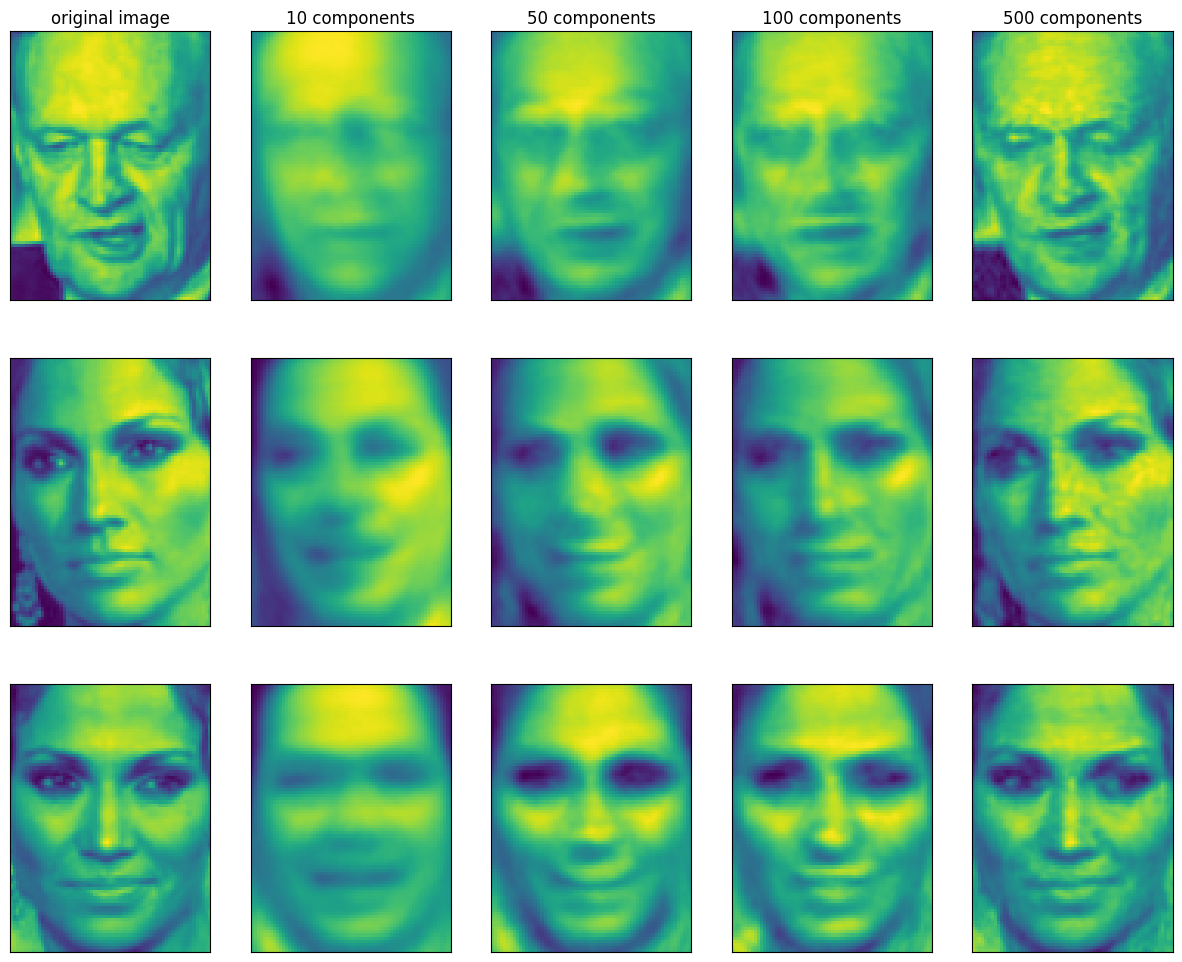

In [86]:
# 主成分の一部のみを用いて、入力データを再現する
# mglearnで実装されているplot_pca_faces()を使った場合、matplotlibのバージョンの違いにより
# 正しい結果を得られないため、ここで関数の定義を行う
def pca_faces(X_train, X_test):
    # copy and pasted from nmf. refactor?
    # Build NMF models with 10, 50, 100, 500 components
    # this list will hold the back-transformd test-data
    reduced_images = []
    for n_components in [10, 50, 100, 500]:
        # build the NMF model
        pca = PCA(n_components=n_components)
        pca.fit(X_train)
        # transform the test data (afterwards has n_components many dimensions)
        X_test_pca = pca.transform(X_test)
        # back-transform the transformed test-data
        # (afterwards it's in the original space again)
        X_test_back = pca.inverse_transform(X_test_pca)
        reduced_images.append(X_test_back)
    return reduced_images

def plot_pca_faces(X_train, X_test, image_shape):
    reduced_images = pca_faces(X_train, X_test)

    # plot the first three images in the test set:
    fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for i, ax in enumerate(axes):
        # plot original image
        # ax[0].imshow(X_test[i].reshape(image_shape),
        #              vmin=0, vmax=1)
        ax[0].imshow(X_test[i].reshape(image_shape))
        # plot the four back-transformed images
        for a, X_test_back in zip(ax[1:], reduced_images):
            # a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1.)
            a.imshow(X_test_back[i].reshape(image_shape))

    # label the top row
    axes[0, 0].set_title("original image")
    for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 500]):
        ax.set_title("%d components" % n_components)

# mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

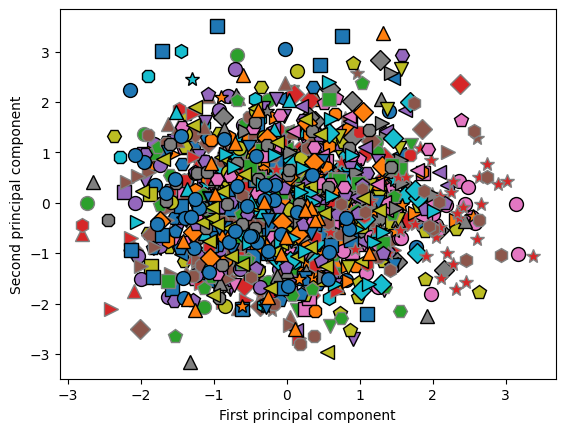

In [87]:
# すべての訓練データを、最初の2つの主成分を用いて散布図をプロットする
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# 非負値行列因子分解（Non-negative Matrix Factorization : NMF）

- 有用な特徴量を抽出（次元削減）することを目的とする<b>教師なし</b>学習手法
- PCAと同様に、個々のデータポイントを、いくつかの成分の重み付き和として表現する
- PCAでは各成分が<b>互いに直交する</b>ものであるのに対して、NMFでは<span style="color: red; "><b>すべての係数と成分が非負</b></span>となるように学習する
    - NMFを適用可能なデータは、個々の特徴量が非負であるものに限られる
- NMFはPCAよりも、もとのデータを人が理解しやすい成分に分解することができる

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


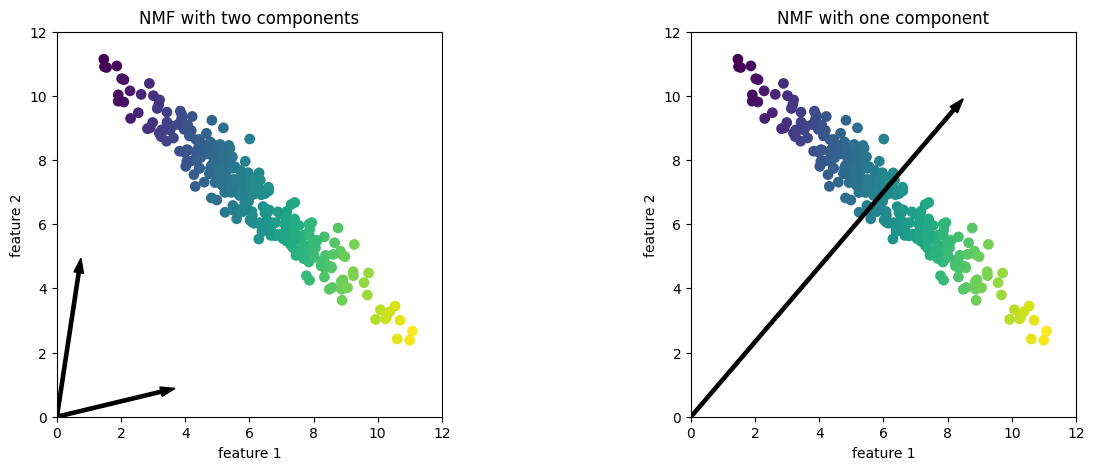

In [112]:
# NMFの合成データへの適用
# バージョンの違いにより、NMFの成分のベクトルの全体が表示されないため、
# スケールを変換する係数（scale）を定義する
from sklearn.decomposition import NMF

scale = 0.5
def plot_nmf_illustration():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    # Add 8 to make sure every point lies in the positive part of the space
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2) + 8

    nmf = NMF(random_state=0)
    nmf.fit(X_blob)
    X_nmf = nmf.transform(X_blob)

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_nmf[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[0].set_xlabel("feature 1")
    axes[0].set_ylabel("feature 2")
    axes[0].set_xlim(0, 12)
    axes[0].set_ylim(0, 12)
    # axes[0].arrow(0, 0, nmf.components_[0, 0], nmf.components_[0, 1], width=.1,
    #               head_width=.3, color='k')
    # axes[0].arrow(0, 0, nmf.components_[1, 0], nmf.components_[1, 1], width=.1,
    #               head_width=.3, color='k')
    axes[0].arrow(0, 0, nmf.components_[0, 0] * scale * scale, nmf.components_[0, 1] * scale * scale, width=.1,
                  head_width=.3, color='k')
    axes[0].arrow(0, 0, nmf.components_[1, 0] * scale, nmf.components_[1, 1] * scale, width=.1,
                  head_width=.3, color='k')
    axes[0].set_aspect('equal')
    axes[0].set_title("NMF with two components")

    # second plot
    nmf = NMF(random_state=0, n_components=1)
    nmf.fit(X_blob)

    axes[1].scatter(X_blob[:, 0], X_blob[:, 1], c=X_nmf[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[1].set_xlabel("feature 1")
    axes[1].set_ylabel("feature 2")
    axes[1].set_xlim(0, 12)
    axes[1].set_ylim(0, 12)
    axes[1].arrow(0, 0, nmf.components_[0, 0], nmf.components_[0, 1], width=.1,
                  head_width=.3, color='k')

    axes[1].set_aspect('equal')
    axes[1].set_title("NMF with one component")

# mglearn.plots.plot_nmf_illustration()
plot_nmf_illustration()

- 左図では、2つの成分（ベクトル）の重み付き和でデータを表現できる
- 右図では、1つの成分（ベクトル）の重み付き和では、直線上のデータしか表現できない（データの平均値に向かう成分となっている）

## 顔画像へのNMFの適用

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


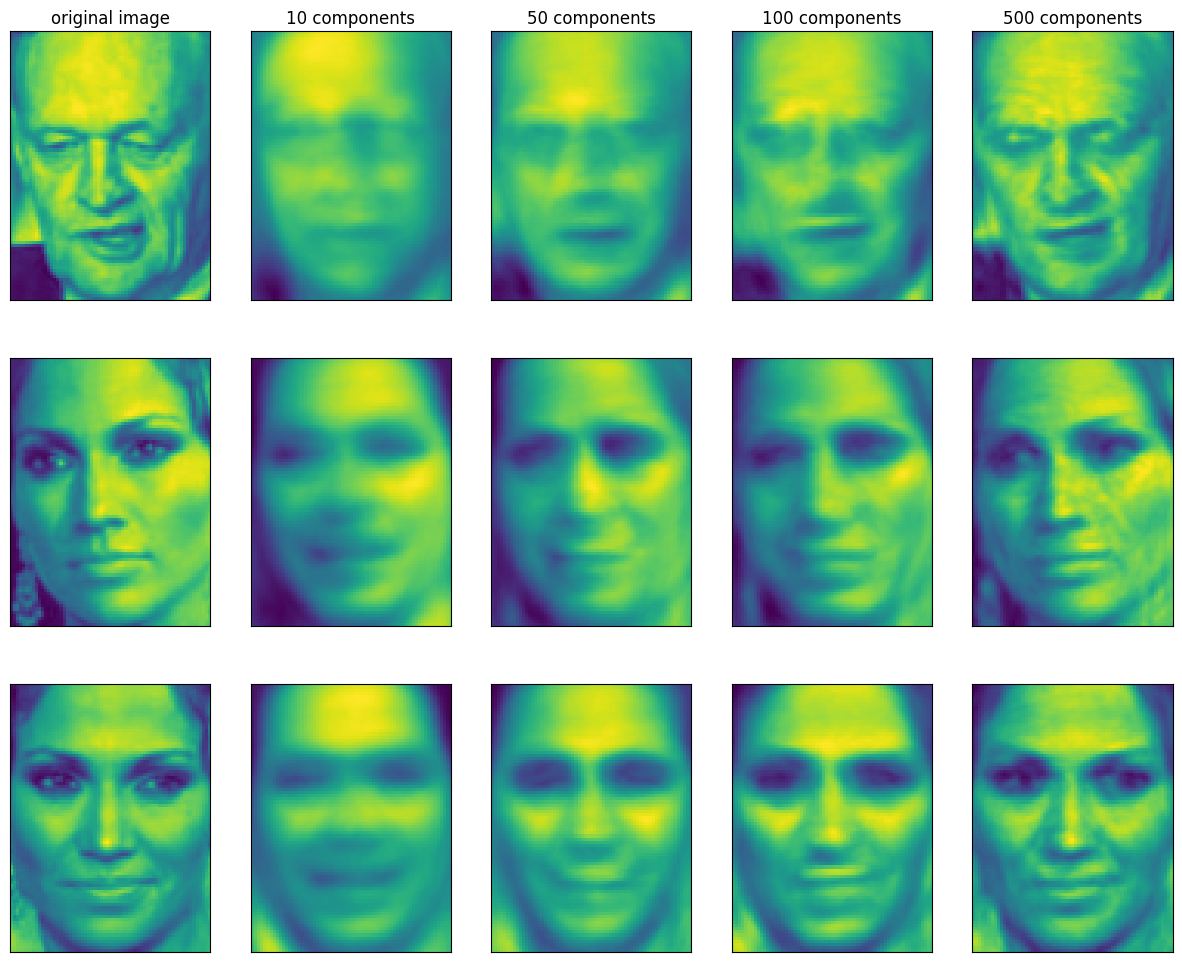

In [119]:
# NMFの顔画像への適用
# バージョンの違いにより、顔画像が表示されないため、関数の一部を変更する
image_shape = people.images[0].shape

def nmf_faces(X_train, X_test):
    # Build NMF models with 10, 50, 100 and 500 components
    # this list will hold the back-transformd test-data
    reduced_images = []
    for n_components in [10, 50, 100, 500]:
        # build the NMF model
        nmf = NMF(n_components=n_components, random_state=0)
        nmf.fit(X_train)
        # transform the test data (afterwards has n_components many dimensions)
        X_test_nmf = nmf.transform(X_test)
        # back-transform the transformed test-data
        # (afterwards it's in the original space again)
        X_test_back = np.dot(X_test_nmf, nmf.components_)
        reduced_images.append(X_test_back)
    return reduced_images


def plot_nmf_faces(X_train, X_test, image_shape):
    reduced_images = nmf_faces(X_train, X_test)

    # plot the first three images in the test set:
    fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for i, ax in enumerate(axes):
        # plot original image
        # ax[0].imshow(X_test[i].reshape(image_shape),
        #              vmin=0, vmax=1)
        ax[0].imshow(X_test[i].reshape(image_shape))
        # plot the four back-transformed images
        for a, X_test_back in zip(ax[1:], reduced_images):
            # a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1)
            a.imshow(X_test_back[i].reshape(image_shape))

    # label the top row
    axes[0, 0].set_title("original image")
    for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 500]):
        ax.set_title("%d components" % n_components)

# mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)
plot_nmf_faces(X_train, X_test, image_shape)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


X_train_nmf.shape: (1547, 15)
X_test_nmf.shape: (516, 15)


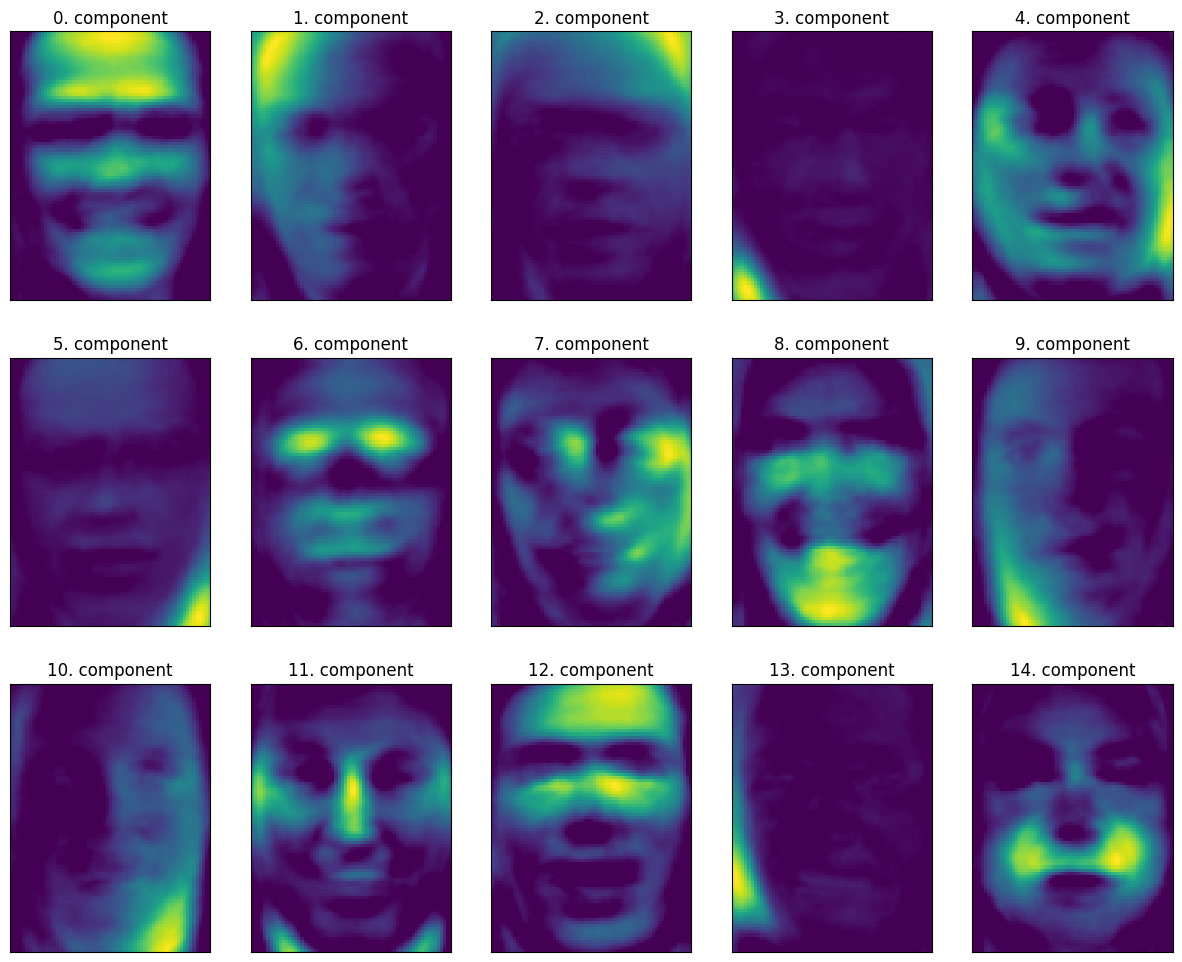

In [118]:
# NMFで抽出された画像特徴を図示する
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
print("X_train_nmf.shape: {}".format(X_train_nmf.shape))
print("X_test_nmf.shape: {}".format(X_test_nmf.shape))

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

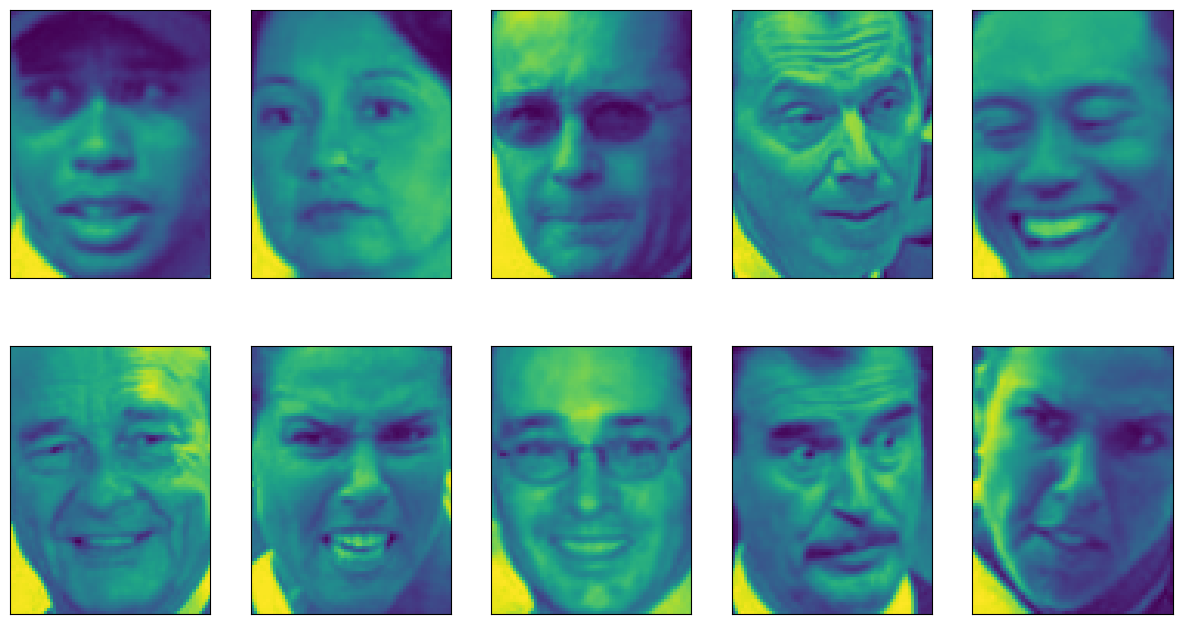

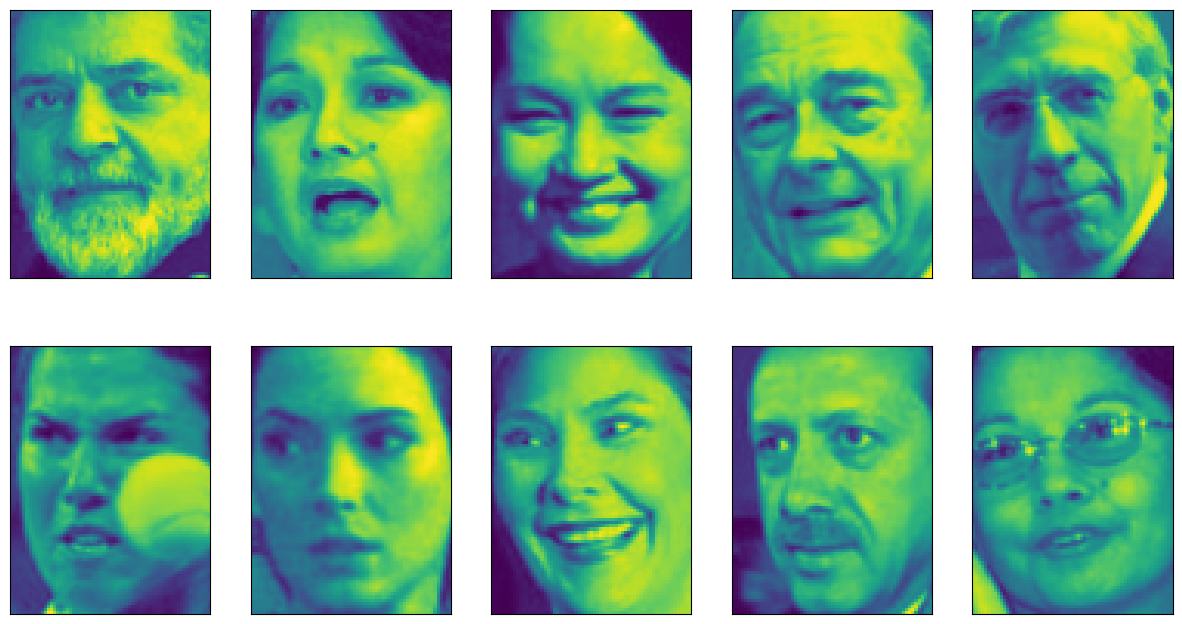

In [122]:
# 抽出された特徴（3. component, 7. component）の成分が強い画像を図示する
compn = 3
# 3つ目の成分でソート、最初の10画像を表示
inds = np.argsort(X_train_nmf[:, compn])[::-1] # X_train_nmfをcomponents_[3]の大きさで昇順ソートして逆順に並び替える
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 7つ目の成分でソート、最初の10画像を表示
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

## 複数の信号源からの情報を追加していく構造のデータ

Text(0, 0.5, 'Signal')

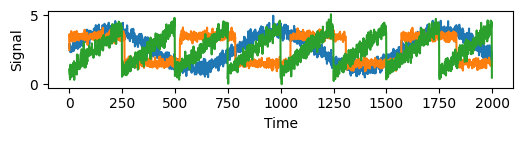

In [128]:
# 3つの信号源からの信号が組み合わされた信号にNMFを適用する
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

- sin波、矩形波、鋸波の合成波（3次元）
- 2000サンプル

Text(0, 0.5, 'Signal')

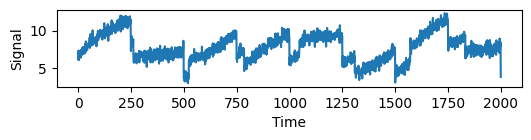

In [127]:
# 3つの信号を混合した信号
S_mixed = S.sum(axis=1)

plt.figure(figsize=(6, 1))
plt.plot(S_mixed, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [134]:
# 混合した信号をNMFで分解する

# 元の信号
print("Shape of original signal: {}".format(S.shape))

# データを混ぜて100次元の状態を作る（3つの信号の重み付き和を100計測器分生成する）
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

# NMFを用いて、3つの信号を復元する
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Shape of original signal: (2000, 3)
Shape of measurements: (2000, 100)
Recovered signal shape: (2000, 3)


In [135]:
# 混合した信号をPCAで分解する
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print("Recovered signal shape: {}".format(H.shape))

Recovered signal shape: (2000, 3)


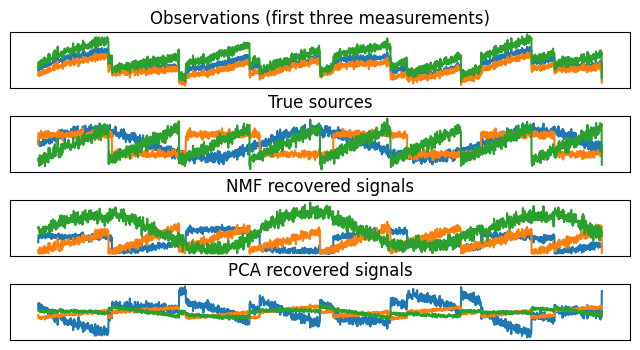

In [139]:
# NMFとPCAが発見した信号を示す
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

- NMFでは3つの信号源の波形をうまく特定できている
    - 信号のスケールがあっていない
    - 生成する成分には特に順番はない
- PCAでは第1主成分（青）をデータの大きな変動を説明するために使っており、第2主成分以降は特に意味のない特徴となっている
- NMF、PCA以外にも、データポイントを固定数の成分集合の重み付き和に分解する手法は以下のようなものがある
    - 独立成分分析（Independent Component Analysis: ICA）
    - 因子分析（Factor Analysis: FA）
    - スパースコーディング（sparse coding）/辞書学習（dictionary learning）
    - http://scikit-learn.org/stable/modules/decomposition.html を参照

# t-SNE（t-Distributed Stochastic Neighbor Embedding）を用いた多様体学習

- 多様体学習アルゴリズムのひとつ
- データセットの可視化に有用
    - 主に2つの特徴量を生成するために用いられる（2次元のデータプロットを行う）
- 多様体学習アルゴリズムの一部（t-SNEを含む）は、<span style="color: red; "><b>訓練データに使ったデータに含まれないデータ（例えばテストセットのデータ）を変換することはできない</b></span>
- 教師あり学習を目的とする場合は、ほとんど用いられない
- t-SNEは、まずランダムな2次元表現を作り、そこから、もとの特徴空間で近いデータポイントを近くに、遠いデータポイント遠くに配置するように探索的に学習する

## 手書き数字データセットへのt-SNEの適用

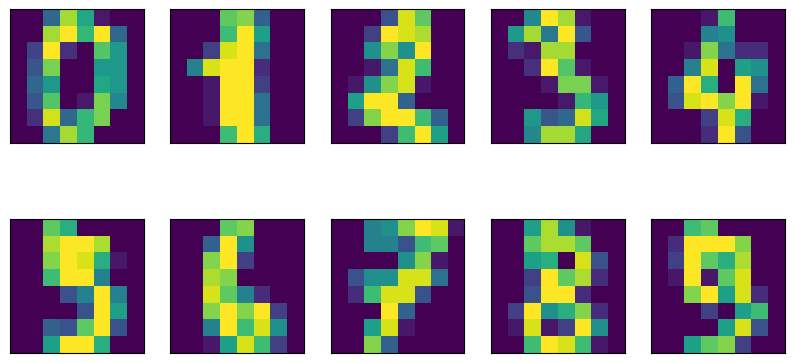

In [141]:
# MNISTデータセットの図示
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

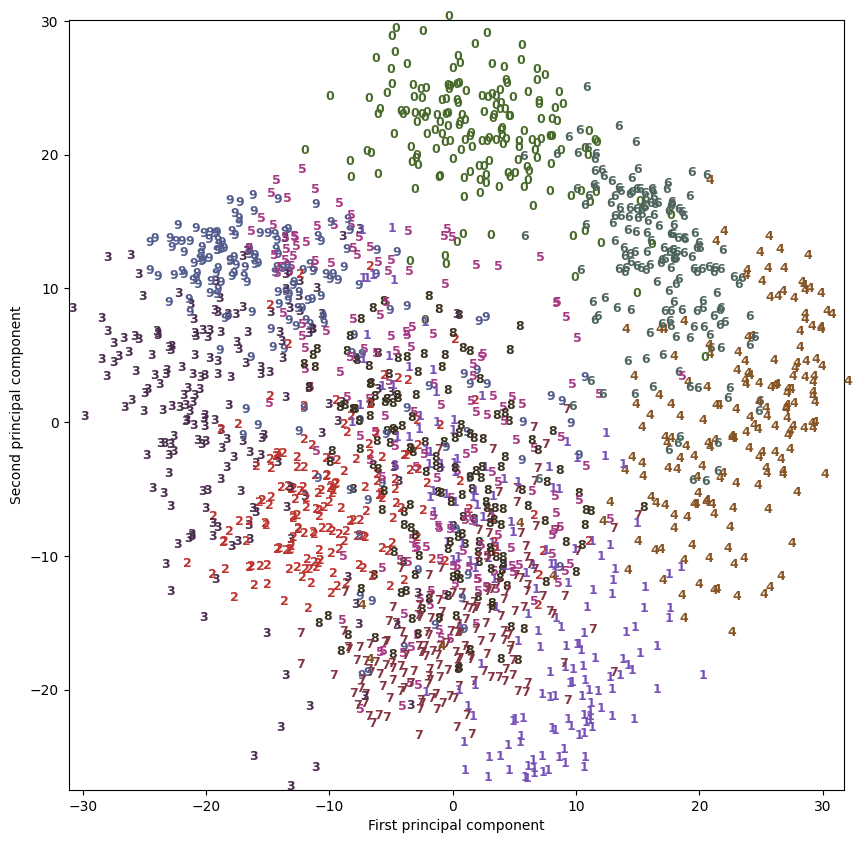

In [143]:
# PCAによる可視化
from sklearn.decomposition import PCA

# PCAモデルを構築
pca = PCA(n_components=2)
pca.fit(digits.data)

# 数値データを最初の2主成分で変形
digits_pca = pca.transform(digits.data)

# 散布図をプロット
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 散布図を数字でプロット
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 't-SNE feature 1')

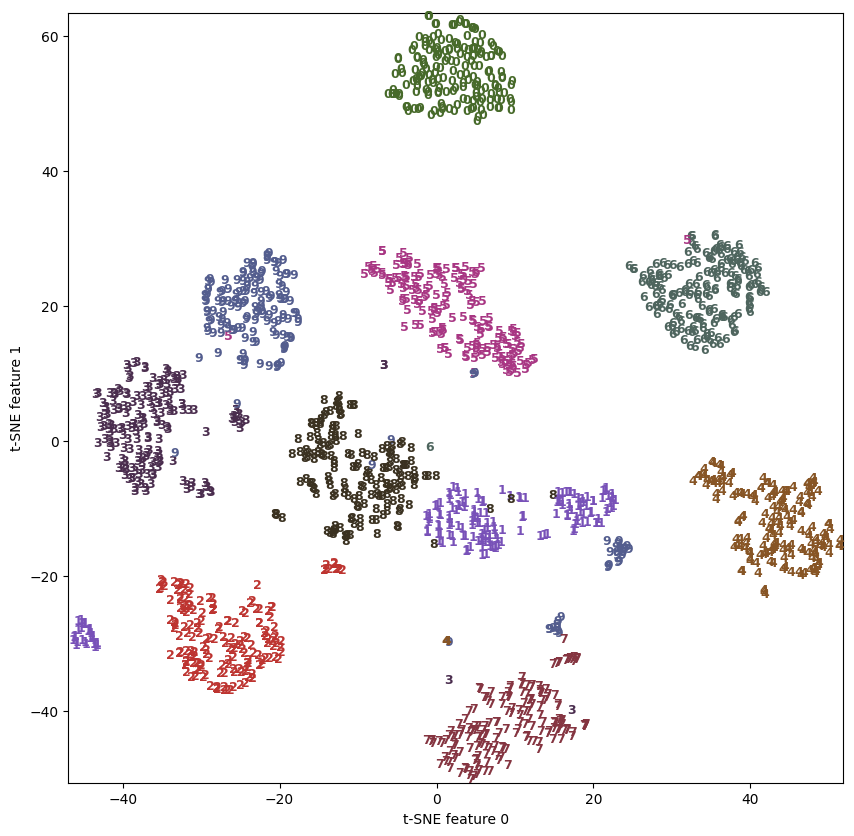

In [144]:
# t-SNEによる可視化
from sklearn.manifold import TSNE

# t-SNEモデルを構築
tsne = TSNE(random_state=42)
# fitではなくfit_transformを用いる。TSNEにはtransformメソッドがない
digits_tsne = tsne.fit_transform(digits.data)

# 散布図をプロット
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 点ではなく数字をテキストとしてプロットする
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

- t-SNEアルゴリズムには、以下のようなチューニングパラメータがある
    - perplexity
    - early_exaggeration